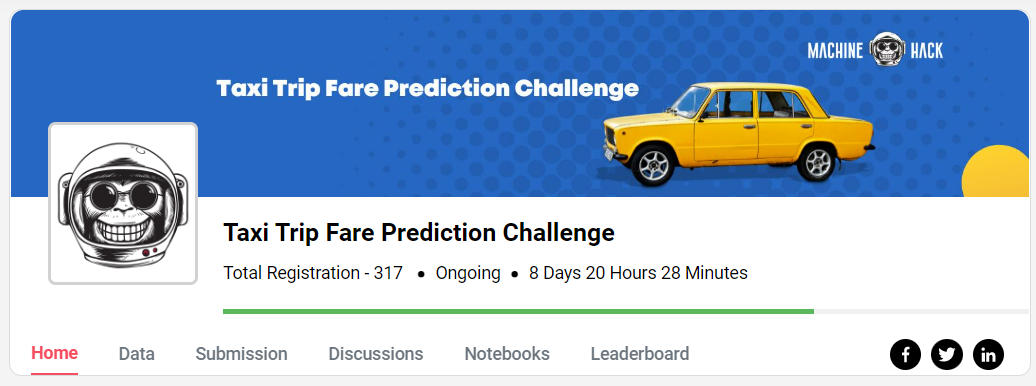

**Train: 35000 rows x 20 columns**

**Test: 15000 rows x 19 columns**

# Data description:

- Trip_distance: The elapsed trip distance in miles reported by the taximeter.
- Rate_code: The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride
- Storeandfwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip
- Payment_type: A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip
- Fare_amount: The time-and-distance fare calculated by the meter
- Extra: Miscellaneous extras and surcharges.
- Mta_tax: 0.50 MTA tax that is automatically triggered based on the metered rate in use.
- Tip_amount: Tip amount credited to the driver for credit card transactions.
- Tolls_amount: Total amount of all tolls paid in the trip.
- Imp_surcharge: 0.30 extra charges added automatically to all rides
- Total_amount: The total amount charged to passengers. Does not include cash tips
- Pickuplocationid: TLC Taxi Zone in which the taximeter was engaged
- Dropofflocationid: TLC Taxi Zone in which the taximeter was disengaged
- Year: The year in which the taxi trip was taken.
- Month: The month on which the taxi trip was taken.
- Day: The day on which the taxi trip was taken.
- Day_of_week: The day of the week on which the taxi trip was taken
- Hour_of_day: Used to determine the hour of the day in 24 hours format
- Trip_duration: The total duration of the trip in seconds
- calculated_total_amount: The total amount the customer has to pay for the taxi.

# Problem Statement

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

In [1]:
# Importing the important python Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']=[10,6]

In [2]:
#reading the Data

df_train = pd.read_csv('train.csv')
df_train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [4]:
# Check the dimentions of the data

df_train.shape, df_test.shape

((35000, 20), (15000, 19))

# Univariate Analysis

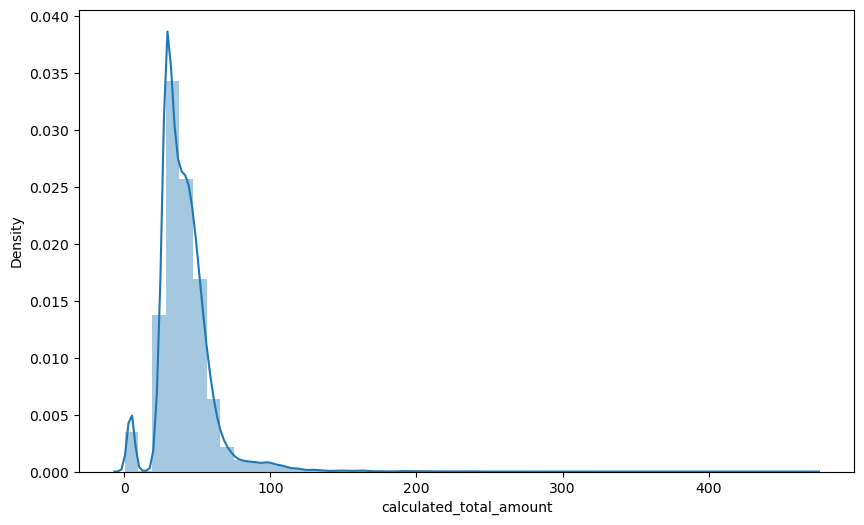

In [5]:
# Target Variable

sns.distplot(df_train.calculated_total_amount)
plt.show()

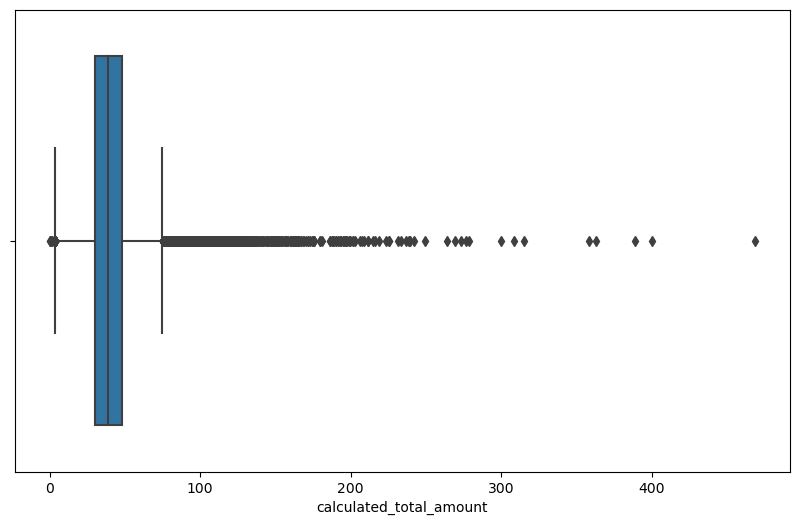

In [6]:
sns.boxplot(df_train.calculated_total_amount)
plt.show()

#Inf: The target variables has outliers in the data.

# Base Model: Avg of the Target

In [7]:
predicted = df_train.calculated_total_amount.mean()
submission = pd.DataFrame({"year":df_test.year,
                           "calculated_total_amount":predicted})

submission.to_csv("My_Basemodel.csv",index = False) #RMSE:19.49345

In [8]:
cd

C:\Users\lenovo


In [9]:
submission.shape

(15000, 2)

In [10]:
submission.drop(['year'],axis = 1, inplace = True)

In [11]:
submission.shape

(15000, 1)

In [12]:
# List of Num Variables.

df_train.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [13]:
cols = ['trip_distance', 'fare_amount', 'extra',
        'tip_amount', 'tolls_amount', 'imp_surcharge',
        'total_amount','trip_duration',
        'calculated_total_amount']

In [14]:
len(cols)

9

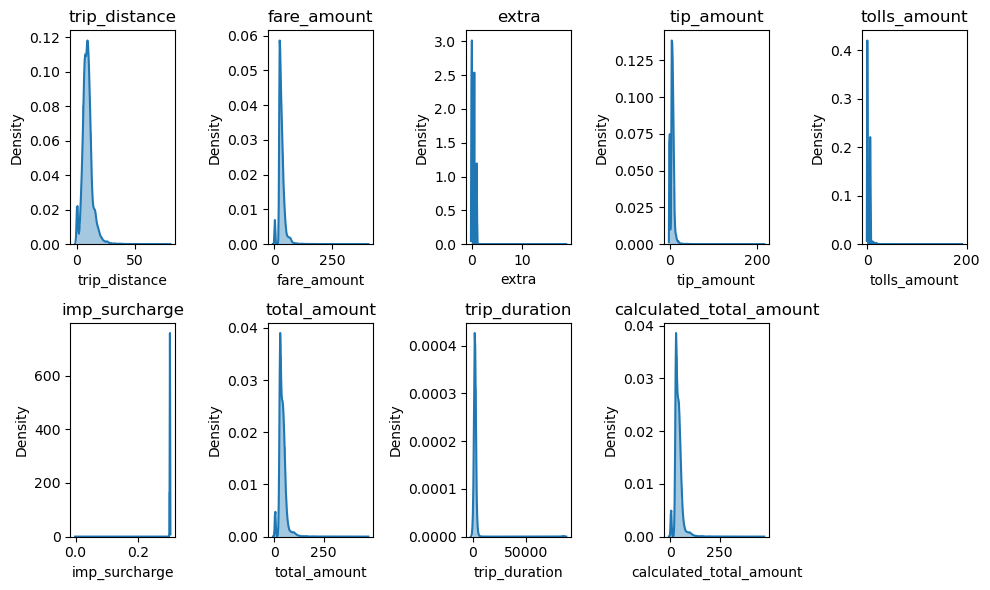

In [15]:
nrows = 2
ncols = 5
iterator = 1

for i in cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df_train.loc[:,i])
    plt.title(i)
    iterator = iterator+1
plt.tight_layout()
plt.show()

In [16]:
#Inf: all the numerical variables are positively skewed except surcharge.

In [17]:
# Statistical Summary of num variables

In [18]:
df_train.loc[:,cols].describe()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,31.920911,0.320337,6.142190,2.262871,0.299940,41.442469,2257.38360,41.324249
std,4.496854,14.689516,0.402590,4.397599,3.578315,0.004242,19.241543,5112.41526,19.167043
min,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.310000,1.00000,0.310000
25%,6.470000,24.000000,0.000000,4.460000,0.000000,0.300000,30.350000,1448.00000,30.300000
50%,8.700000,29.000000,0.000000,6.050000,0.000000,0.300000,38.470000,1862.00000,38.460000
75%,10.990000,36.000000,0.500000,8.100000,5.760000,0.300000,48.352500,2340.00000,48.200000
max,79.010000,400.000000,18.500000,215.000000,189.500000,0.300000,468.350000,86347.00000,468.350000


In [19]:
# Total_amount and calculated_total_amount are same in terms of statistical summary.

In [20]:
#total_amount > calculated_total_amount...count

In [21]:
df_train.loc[df_train.total_amount>df_train.calculated_total_amount, ].shape

(17601, 20)

In [22]:
df_train.loc[df_train.total_amount==df_train.calculated_total_amount, ].shape

(17, 20)

In [23]:
df_train.loc[df_train.total_amount<df_train.calculated_total_amount,].shape

(17382, 20)

In [24]:
#Note for Feature Engg :

# Create a new variable on the basis of total_amount and calculated_total_amount.

# Combine Train and Test

In [25]:
combined = pd.concat([df_train,df_test],ignore_index=True)

In [26]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [27]:
combined.tail()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,1121.0,NaN
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,1744.0,NaN
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,1362.0,NaN
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,101.0,NaN
49999,9.25,1,N,1,27.0,0.0,0.5,5.03,5.76,0.3,38.59,138,107,2018,9,23,6,10,2444.0,NaN


In [28]:
# Univariate Analysis - Cat Variables..

combined.select_dtypes(include= np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [29]:
combined.select_dtypes(include= np.object).columns

Index(['store_and_fwd_flag'], dtype='object')

In [30]:
cat_cols = ['rate_code', 'payment_type','mta_tax','year',
       'month', 'store_and_fwd_flag']

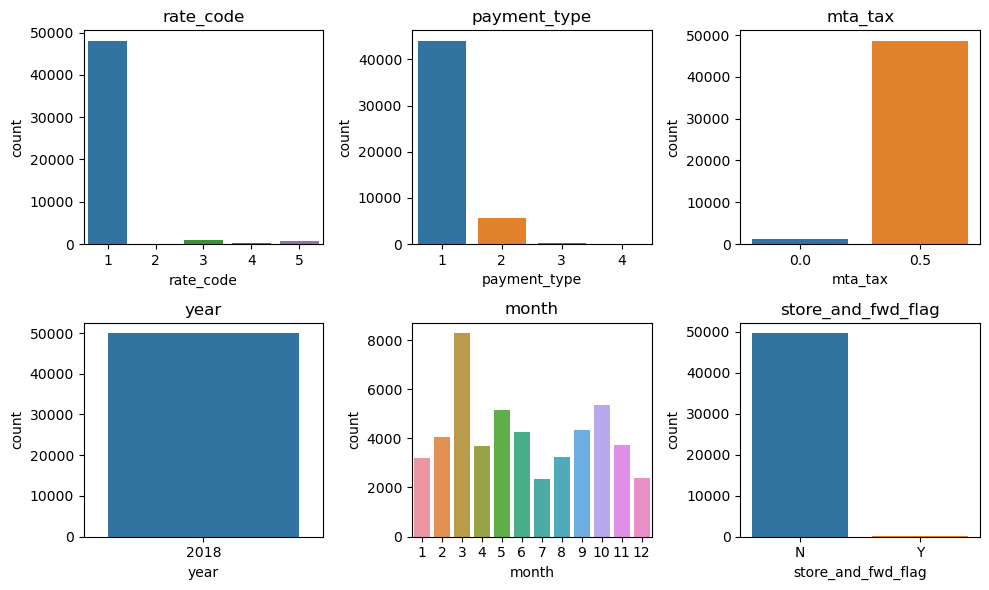

In [31]:
nrows = 2
ncols = 3
iterator = 1

for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    iterator = iterator + 1
plt.tight_layout()
plt.show()

# Bivariate Analysis : Cat vs Num

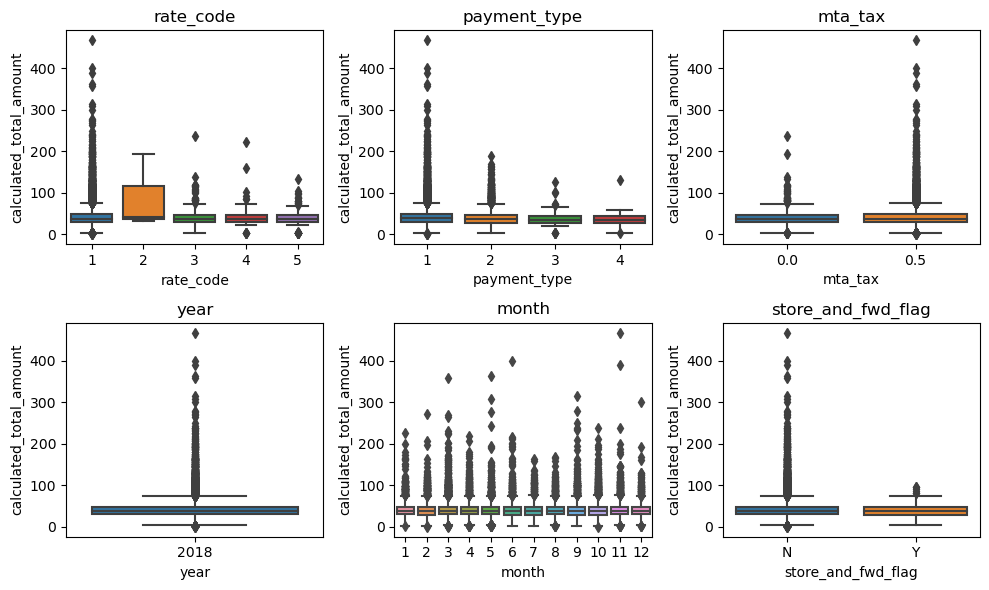

In [32]:
nrows = 2
ncols = 3
iterator = 1

for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x = combined.loc[:,i], y = combined.calculated_total_amount)
    plt.title(i)
    iterator = iterator + 1
plt.tight_layout()
plt.show()

# Bivariate Analysis : Num vs Num

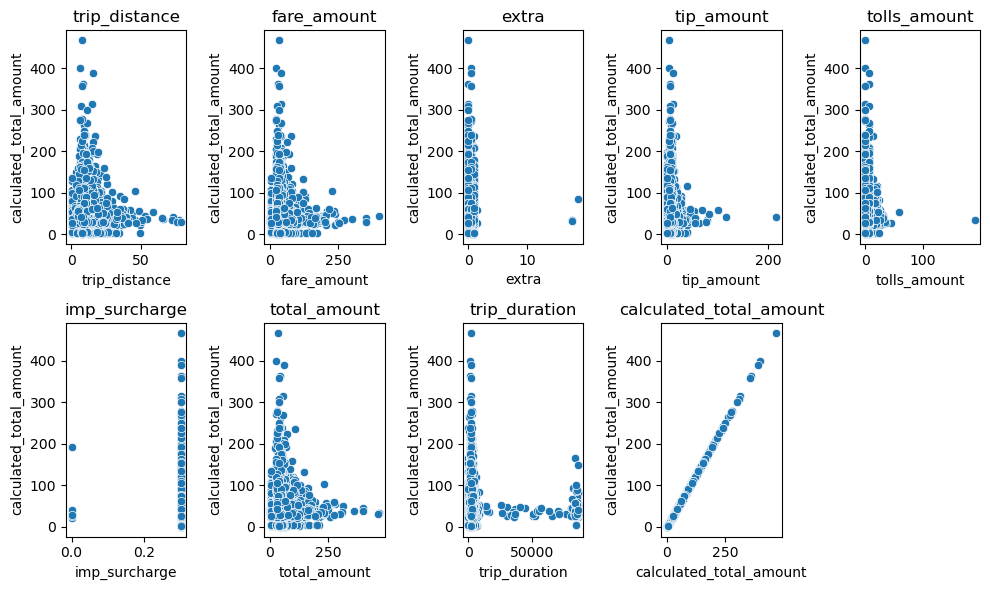

In [33]:
nrows = 2
ncols = 5
iterator = 1

for i in cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x = combined.loc[:,i], y = combined.calculated_total_amount)
    plt.title(i)
    iterator = iterator + 1
plt.tight_layout()
plt.show()

In [34]:
# Inf: Predictors have a very weak correlation with Target...

In [35]:
# Heatmap...

<AxesSubplot:>

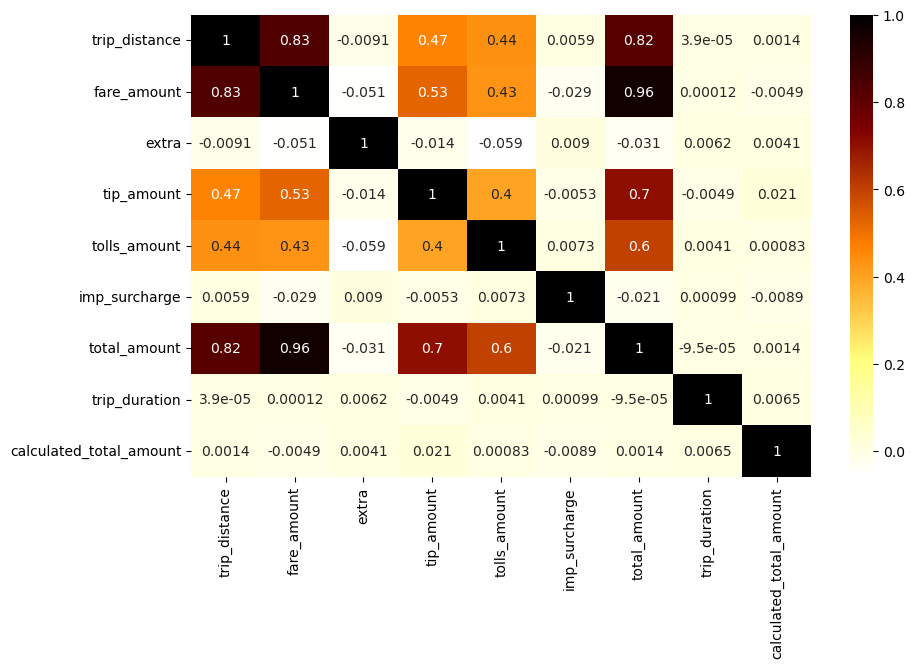

In [36]:
sns.heatmap(combined.loc[:,cols].corr(),
                        annot =True, cmap ="afmhot_r")

In [37]:
# Statistical test to verify which columns are important.

In [38]:
import scipy.stats as stats

In [39]:
# for i in cols:
#     teststats, pvalue = stats.mannwhitneyu(df_train.loc[:,i], df_train.calculated_total_amount)
#     print("PValue for", i,"var is ", np.round(pvalue, 6))

In [40]:
# HO: The Feature is not significant foor target
# H1: The Feature is significant variable for target

In [41]:
for i in cols:
    teststats, pvalue = stats.ttest_ind(df_train.loc[:,i], df_train.calculated_total_amount)
    print("PValue for", i,"var is ", np.round(pvalue, 6))

PValue for trip_distance var is  0.0
PValue for fare_amount var is  0.0
PValue for extra var is  0.0
PValue for tip_amount var is  0.0
PValue for tolls_amount var is  0.0
PValue for imp_surcharge var is  0.0
PValue for total_amount var is  0.415445
PValue for trip_duration var is  0.0
PValue for calculated_total_amount var is  1.0


# Outlier Removal

In [42]:
q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)

iqr =q3-q1

ul = q3+1.5*iqr
ll = q1-1.5*iqr

In [43]:
combined.loc[~((combined<ll)  | (combined>ul)).any(axis = 1)].shape

(33577, 20)

In [44]:
wt_outliers = combined

# Feature Engg.

In [45]:
wt_outliers.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4


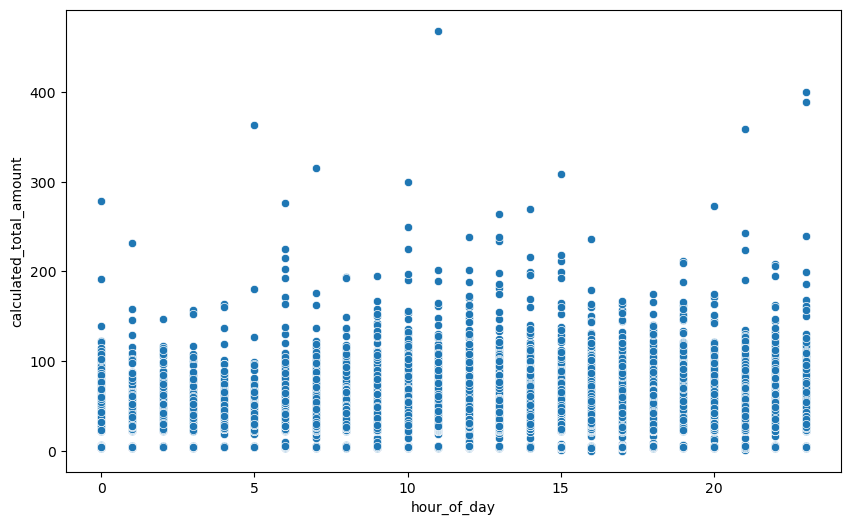

In [46]:
sns.scatterplot(wt_outliers.hour_of_day, wt_outliers.calculated_total_amount)
plt.show()

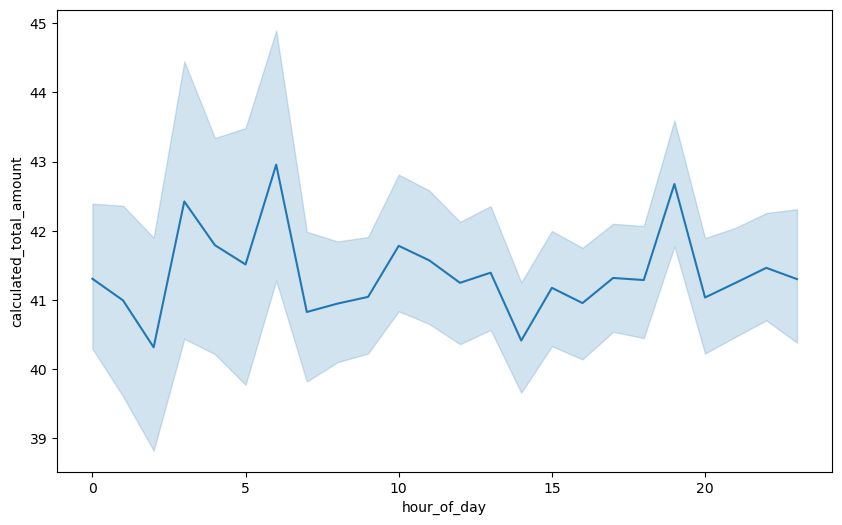

In [47]:
sns.lineplot(wt_outliers.hour_of_day, wt_outliers.calculated_total_amount)
plt.show()

In [48]:
# Inf:

# Busy Hours: 10,15,16,17,18,19,20
# Rush Hours: 1 and 0

In [49]:
wt_outliers["rush_hour"] = wt_outliers.hour_of_day.apply(lambda x:1 if x in[10,15,16,17,18,19,20] else 0)

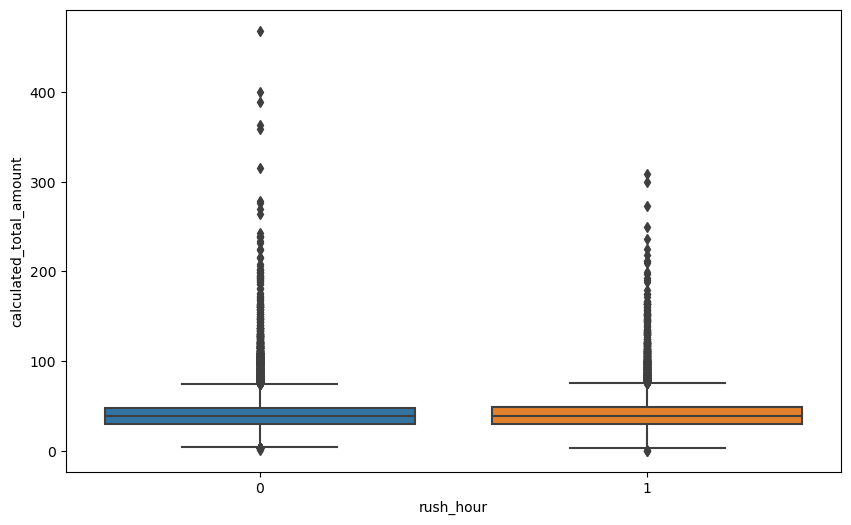

In [50]:
sns.boxplot(x = "rush_hour", y = "calculated_total_amount", data = wt_outliers)
plt.show()

In [51]:
wt_outliers["target_diff"] = wt_outliers["total_amount"] - wt_outliers["calculated_total_amount"]
def difference(x):
    if x>0:
        return("Discount")
    elif(x==0):
        return("Equal")
    else:
        return("Excess")

In [52]:
wt_outliers["target_diff_cat"] = wt_outliers.target_diff.apply(difference)

In [53]:
wt_outliers.groupby("day_of_week")["calculated_total_amount"].describe()

# we need to bring numerical var for groupby 

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,4654.0,41.672660,19.231342,2.80,30.350,38.76,48.67,278.78
1,5540.0,41.284208,20.902749,0.90,30.075,38.29,48.06,468.35
2,5498.0,41.230764,19.063380,0.31,30.300,38.15,48.07,276.38
3,5584.0,40.817104,16.980414,3.30,30.350,38.30,48.16,207.80
4,5307.0,41.330584,19.191978,0.31,30.300,38.30,48.35,264.30
5,4036.0,41.552272,19.576463,3.30,30.360,38.76,48.07,315.38
6,4381.0,41.550742,19.149052,1.30,30.350,38.50,48.36,389.12


In [54]:
# Inf:

# As we can see there is no specific pattern between days and amount...
# We will apply lustering  technique to generate the cluster labels...

In [55]:
wt_outliers.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'rush_hour',
       'target_diff', 'target_diff_cat'],
      dtype='object')

In [56]:
# Find the cluster count for 'month', 'day', 'day_of_week', 'hour_of_day'

In [57]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(random_state = 0)
elbow = KElbowVisualizer(estimator= kmeans, random_state = 0)

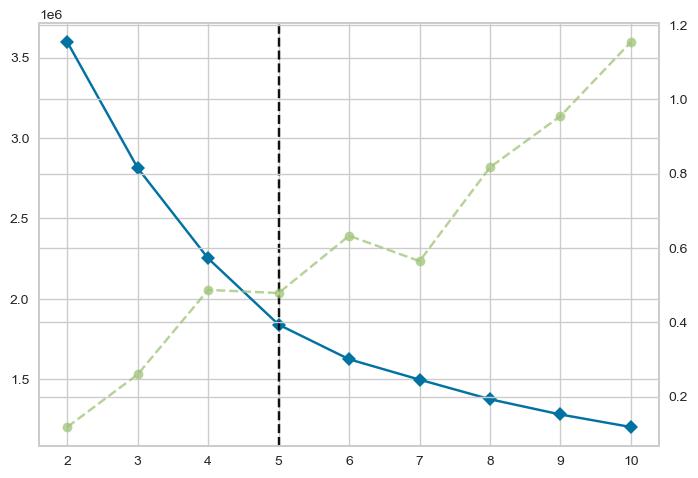

In [59]:
elbow = KElbowVisualizer(estimator= kmeans, random_state = 0)
cluster_data =wt_outliers.loc[:,['month', 'day', 'day_of_week', 'hour_of_day']]

elbow.fit(cluster_data)
plt.show()

In [60]:
# Use 5 cluster to generate the lables

In [61]:
kmeans = KMeans(n_clusters= 5, random_state=0)
cluster_data = wt_outliers.loc[:,['month', 'day', 'day_of_week', 'hour_of_day']]

labels = kmeans.fit(cluster_data)
wt_outliers["cluster_labels"] = labels.labels_

In [62]:
df_train.payment_type.unique()

array([1, 2, 3, 4], dtype=int64)

In [63]:
wt_outliers.payment_type.unique()

array([1, 2, 3, 4], dtype=int64)

In [64]:
wt_outliers.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,...,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,target_diff,cluster_labels
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.0,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,35000.000000,50000.000000,35000.000000,50000.000000
mean,9.093300,1.10710,1.123720,31.896397,0.320838,0.486960,6.144731,2.259124,0.299934,41.417478,...,2018.0,6.12992,15.309240,2.882520,13.814780,2250.550020,41.324249,0.369700,0.118221,1.977340
std,4.491785,0.57243,0.350051,14.632630,0.407761,0.079687,4.436417,3.537413,0.004449,19.232173,...,0.0,3.33669,8.685061,1.925064,6.222891,5033.290248,19.167043,0.482728,27.139829,1.361904
min,0.010000,1.00000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,...,2018.0,1.00000,1.000000,0.000000,0.000000,1.000000,0.310000,0.000000,-431.750000,0.000000
25%,6.490000,1.00000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,...,2018.0,3.00000,7.000000,1.000000,10.000000,1452.000000,30.300000,0.000000,-12.450000,1.000000
50%,8.710000,1.00000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,...,2018.0,6.00000,16.000000,3.000000,14.000000,1863.000000,38.460000,0.000000,0.100000,2.000000
75%,10.972500,1.00000,1.000000,36.000000,0.500000,0.500000,8.080000,5.760000,0.300000,48.300000,...,2018.0,9.00000,23.000000,4.000000,19.000000,2345.000000,48.200000,1.000000,12.610000,3.000000
max,79.010000,5.00000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,...,2018.0,12.00000,31.000000,6.000000,23.000000,86347.000000,468.350000,1.000000,434.400000,4.000000


In [65]:
# drop the insignificant vars...

In [66]:
new = wt_outliers.drop(["imp_surcharge","year","month","day","day_of_week","hour_of_day","pickup_location_id","dropoff_location_id"], axis = 1)

In [67]:
new.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,target_diff,target_diff_cat,cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30,0,16.40,Discount,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40,1,-32.85,Excess,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36,0,27.31,Discount,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30,1,42.01,Discount,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80,0,3.56,Discount,1


# Split the data in Train and Test

In [68]:
df_train.shape, df_test.shape

((35000, 20), (15000, 19))

In [69]:
new.loc[df_train.shape[0]:,:].shape

(15000, 16)

In [70]:
df_train.shape, df_test.shape, new.shape

((35000, 20), (15000, 19), (50000, 16))

In [71]:
# outlier removal should be done on training data
# after train test split remove outliers

In [74]:
newtrain = new.loc[0:df_train.shape[0]-1, :]
newtest = new.loc[df_train.shape[0]:, :]

In [75]:
newtrain.shape, newtest.shape

((35000, 16), (15000, 16))

In [78]:
newtest.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,target_diff,target_diff_cat,cluster_labels
35000,15.7,1,N,2,45.0,0.0,0.5,0.00,0.0,45.80,3967.0,NaN,1,NaN,Excess,1
35001,7.3,1,N,1,25.5,0.0,0.5,7.89,0.0,34.19,1491.0,NaN,1,NaN,Excess,3


In [79]:
newtrain.drop(["target_diff","target_diff_cat"], axis = 1, inplace =True)

In [80]:
newtest.drop(["calculated_total_amount","target_diff","target_diff_cat"],axis =1, inplace =True)

In [81]:
newtrain.shape, newtest.shape

((35000, 14), (15000, 13))

# Outlier from Train Data

In [82]:
# Outlier from Train Data
# Apply Statistical Analysis
# Models ~ Linear Regression, Ridge, Lasso and Random Forest, GBM, XGBOOST
# Staking Model ~ LightGBM & Standalone LightGBM...

In [83]:
q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)

iqr = q3 -q1

ul = q3+1.5*iqr
ll = q1-1.5*iqr

In [84]:
final = newtrain.loc[~((newtrain<ll) | (newtrain>ul)).any(axis=1)]

In [85]:
final.shape

(25047, 14)

In [86]:
final.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30,0,0
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80,0,1
5,12.65,1,N,1,41.5,0.0,0.5,0.02,5.76,48.08,2029.0,30.95,0,0


In [87]:
final.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_duration', 'calculated_total_amount', 'rush_hour',
       'cluster_labels'],
      dtype='object')

In [89]:
cat_cols =['rate_code', 'payment_type', 'mta_tax', 'store_and_fwd_flag',"rush_hour"]

# Anova for payment type

In [93]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [94]:
model = sfa.ols("calculated_total_amount~rate_code",data = newtrain).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
rate_code      1.0  1.764871e+03  1764.870965  4.804519  0.028392
Residual   34998.0  1.285601e+07   367.335602       NaN       NaN


In [91]:
model = sfa.ols("calculated_total_amount~payment_type",data = newtrain).fit()

print(anova_lm(model))

                   df        sum_sq       mean_sq          F        PR(>F)
payment_type      1.0  2.106604e+04  21066.038965  57.434437  3.580489e-14
Residual      34998.0  1.283671e+07    366.784109        NaN           NaN


In [99]:
model = sfa.ols("calculated_total_amount~mta_tax",data = newtrain).fit()

print(anova_lm(model))

               df        sum_sq     mean_sq         F    PR(>F)
mta_tax       1.0  4.002265e+01   40.022653  0.108939  0.741357
Residual  34998.0  1.285774e+07  367.384887       NaN       NaN


In [98]:
model = sfa.ols("calculated_total_amount~store_and_fwd_flag",data = newtrain).fit()

print(anova_lm(model))

                         df        sum_sq     mean_sq         F    PR(>F)
store_and_fwd_flag      1.0  3.789820e+02  378.982032  1.031594  0.309792
Residual            34998.0  1.285740e+07  367.375201       NaN       NaN


In [92]:
model = sfa.ols("calculated_total_amount~rush_hour",data = newtrain).fit()

print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
rush_hour      1.0  3.223534e+02  322.353389  0.877446  0.348909
Residual   34998.0  1.285745e+07  367.376819       NaN       NaN


In [100]:
newtrain.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30,0,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80,0,1


In [101]:
newtrain.drop(["store_and_fwd_flag","mta_tax"],axis = 1, inplace=True)
newtest.drop(["store_and_fwd_flag","mta_tax"],axis = 1, inplace=True)

# Modeling

In [102]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold

In [103]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [104]:
x = newtrain.drop("calculated_total_amount", axis = 1)
y = newtrain.calculated_total_amount

# Linear Regression

In [105]:
pred = []
lr = LinearRegression()


for train_index, test_index in kfold.split(x, y):
    xtrain = x.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest))

# Generate the final output.

In [106]:
pd.DataFrame(pred).shape

(5, 15000)

In [108]:
pd.DataFrame(pred).T.shape

(15000, 5)

In [110]:
output = pd.DataFrame(pred).T.mean(axis = 1)

In [111]:
submission = pd.DataFrame({"calculated_total_amount": output})
submission.to_csv("LRmodel.csv", index = False)

In [112]:
cd

C:\Users\lenovo


In [114]:
final.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration', 'calculated_total_amount', 'rush_hour',
       'cluster_labels'],
      dtype='object')

In [113]:
newtest.columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration',
       'rush_hour', 'cluster_labels'],
      dtype='object')

In [116]:
final.drop(["store_and_fwd_flag","mta_tax","store_and_fwd_flag","mta_tax"],axis = 1, inplace=True)

In [117]:
final.columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration',
       'calculated_total_amount', 'rush_hour', 'cluster_labels'],
      dtype='object')

# Lasso

In [118]:
pred = []
lr = Lasso()


for train_index, test_index in kfold.split(x, y):
    xtrain = x.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest))

In [119]:
submission = pd.DataFrame({"calculated_total_amount": output})
submission.to_csv("Lasso.csv", index = False)

# Random Forest Regressor

In [120]:
pred = []
lr = RandomForestRegressor()


for train_index, test_index in kfold.split(x, y):
    xtrain = x.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest))

In [121]:
submission = pd.DataFrame({"calculated_total_amount": output})
submission.to_csv("RandomForestRegressor.csv", index = False)

# Public Score:- 19.48831

# LightGBM

In [123]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [124]:
pred = []

from lightgbm import LGBMRegressor
lr = LGBMRegressor()


for train_index, test_index in kfold.split(x, y):
    xtrain = x.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest))

In [125]:
submission = pd.DataFrame({"calculated_total_amount": output})
submission.to_csv("LGBMRegressor.csv", index = False)

# Public Score:- 19.48831

# Stacking Model

In [127]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

In [128]:
basemodels = [('lr', LinearRegression()), ('rf', RandomForestRegressor()),('gbm', GradientBoostingRegressor()), ('lasso', Lasso())]

finalmodel = XGBRegressor()

stack =StackingRegressor(estimators= basemodels, final_estimator= finalmodel, cv= KFold(n_splits=5, shuffle=True, random_state=0))

In [129]:
pred = []

for train_index, test_index in kfold.split(x, y):
    xtrain = x.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(stack.fit(xtrain, ytrain).predict(newtest))

In [130]:
# Generate the final Output
output = pd.DataFrame(pred).T.mean(axis = 1)
submission = pd.DataFrame({"calculated_total_amount": output})
submission.to_csv("StackingModel.csv", index = False)

# Public Score:- 19.57518

**END**